In [15]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

In [ ]:
# LOAD THE DATASET

In [16]:
df = pd.read_csv('loan_train.csv')
#default 5 rows
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [17]:
df.shape

(346, 10)

### Convert to date time object 

In [18]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [19]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

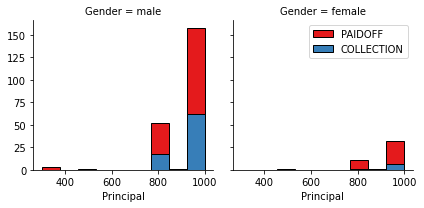

In [20]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

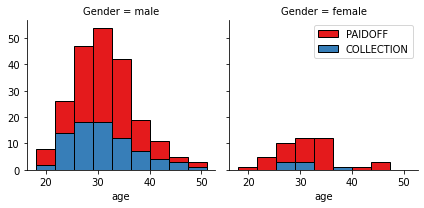

In [21]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

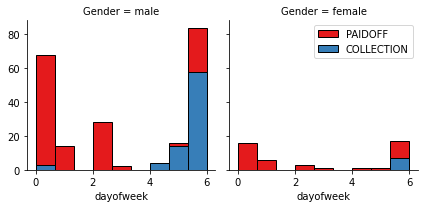

In [22]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [23]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [24]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay their loans while only 73 % of males pay their loan


Lets convert male to 0 and female to 1:


In [25]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1



#### How about education?

In [26]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [27]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical variables to binary variables and append them to the feature Data Frame 

In [28]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets define feature sets, X:

In [29]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Our lables

In [30]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [31]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Algorithms:

- K Nearest Neighbor (KNN)
- Decision Tree

# Extra pre-processing

order the data so that is it possible to make balanced train and test sets.

In [32]:
# Back to original dataframe
new_df = pd.concat([Feature, df['loan_status']], axis=1)

# Binary values for the targets
new_df['loan_status'].replace({'PAIDOFF': -1, 'COLLECTION': 1}, inplace=True)

# Order by target
new_df.sort_values(by=['loan_status'], inplace=True)

# Get targets and features
target = new_df['loan_status'].values
temp = new_df[['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor', 'High School or Below', 'college']]
features = preprocessing.StandardScaler().fit(temp).transform(temp)

In [33]:
# Separate into train and test sets
from sklearn.model_selection import train_test_split

# Separate train and test sets in a balanced way
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.15, random_state=42, stratify=target)
print ('Train set:', features_train.shape,  target_train.shape)
print ('Test set:', features_test.shape,  target_test.shape)

#print(f'\n\n{features_train[0]}\n\n')

unique, counts = np.unique(target, return_counts=True)
print(f'Total set distribution: {dict(zip(unique, counts))}')

unique, counts = np.unique(target_train, return_counts=True)
print(f'Train set distribution: {dict(zip(unique, counts))}')

unique, counts = np.unique(target_test, return_counts=True)
print(f'Test set distribution: {dict(zip(unique, counts))}')


Train set: (294, 8) (294,)
Test set: (52, 8) (52,)
Total set distribution: {-1: 260, 1: 86}
Train set distribution: {-1: 221, 1: 73}
Test set distribution: {-1: 39, 1: 13}


# K Nearest Neighbor(KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [35]:
max_k = 30
test_jaccard = np.zeros(max_k)
train_jaccard = np.zeros(max_k)
test_f1 = np.zeros(max_k)
train_f1 = np.zeros(max_k)
best_knn = None

for k in range(1, max_k + 1):
    # Fit model
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(features_train, target_train)
    
    # Predict test set
    target_pred = knn.predict(features_test)
    
    # Evaluate results - Jaccard score
    current = metrics.accuracy_score(target_test, target_pred)
    
    if current > test_jaccard.max():
        best_knn = knn
        
    test_jaccard[k - 1] = current
    train_jaccard[k - 1] = metrics.accuracy_score(target_train, knn.predict(features_train))
    
    # Evaluate results - F1-score
    test_f1[k - 1] = metrics.f1_score(target_test, target_pred)
    train_f1[k - 1] = metrics.f1_score(target_train, knn.predict(features_train))

print(f'Highest test Jaccard score is {test_jaccard.max()} with k = {test_jaccard.argmax() + 1}')
print(f'Highest test F1-score is {test_f1.max()} with k = {test_f1.argmax() + 1}')

Highest test Jaccard score is 0.7692307692307693 with k = 11
Highest test F1-score is 0.4347826086956522 with k = 3


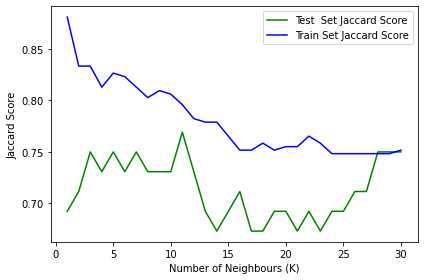

In [36]:
# Plot Jaccard score
plt.plot(range(1, max_k + 1), test_jaccard, 'g', label='Test  Set Jaccard Score')
plt.plot(range(1, max_k + 1), train_jaccard, 'b', label='Train Set Jaccard Score')
plt.legend()
plt.ylabel('Jaccard Score')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

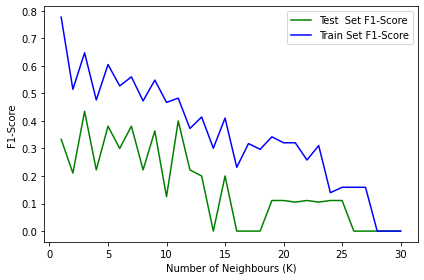

In [37]:
# Plot F1-score
plt.plot(range(1, max_k + 1), test_f1, 'g', label='Test  Set F1-Score')
plt.plot(range(1, max_k + 1), train_f1, 'b', label='Train Set F1-Score')
plt.legend()
plt.ylabel('F1-Score')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Fit the model
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 50)
dec_tree.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [40]:
# Predict test set
target_pred = dec_tree.predict(features_test)

# Evaluate results - Jaccard score
test_jaccard = metrics.accuracy_score(target_test, target_pred)
train_jaccard = metrics.accuracy_score(target_train, dec_tree.predict(features_train))

# Evaluate results - F1-score
test_f1 = metrics.f1_score(target_test, target_pred)
train_f1 = metrics.f1_score(target_train, dec_tree.predict(features_train))

print(f'Test Jaccard score is {test_jaccard}')
print(f'Test F1-score is {test_f1}')

Test Jaccard score is 0.6538461538461539
Test F1-score is 0.24999999999999994


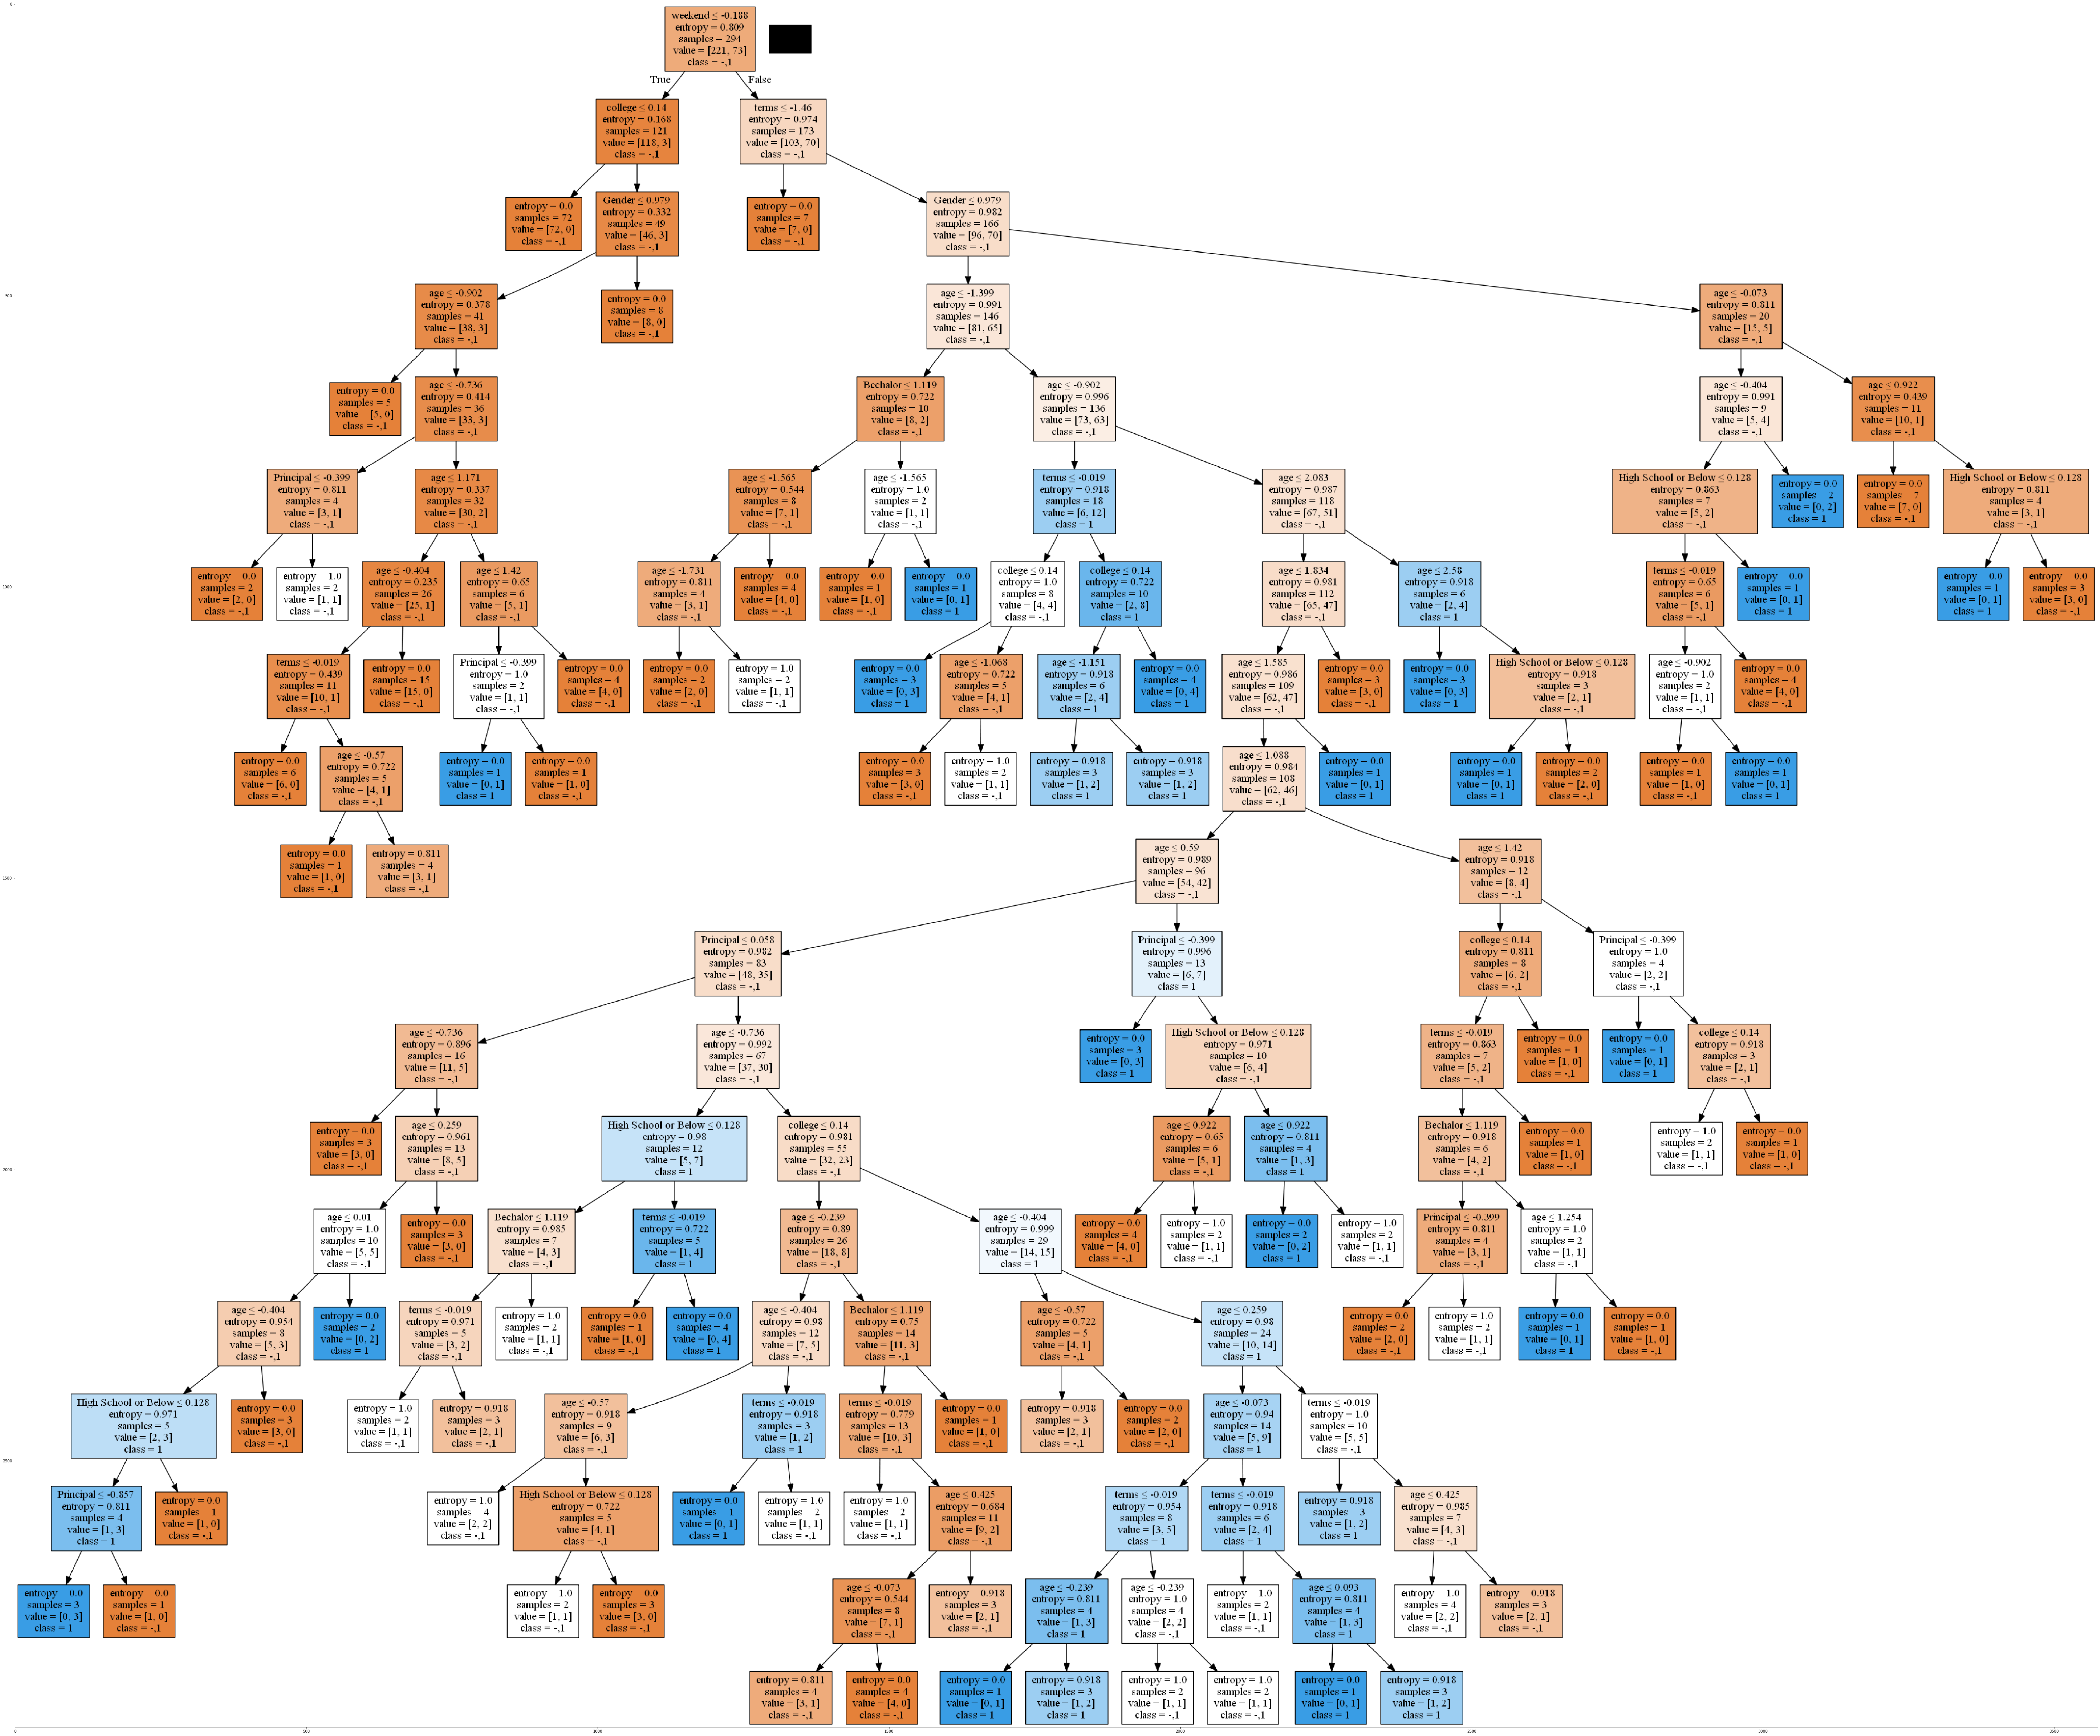

In [41]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

str_target_train = [",".join(item) for item in target_train.astype(str)]

dot_data = StringIO()
filename = "tree.png"
featureNames = new_df.columns[0:8]
targetNames = new_df['loan_status'].unique().tolist()
out = tree.export_graphviz(dec_tree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(str_target_train), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

# Model Evaluation using Test set

In [42]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Load Test set for evaluation 

In [43]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Pre-processing

In [44]:
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1, inplace=True)

# Back to original dataframe
new_df = pd.concat([Feature, test_df['loan_status']], axis=1)

# Binary values for the targets
new_df['loan_status'].replace({'PAIDOFF': -1, 'COLLECTION': 1}, inplace=True)

# Get targets and features
target = new_df['loan_status'].values
temp = new_df[['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor', 'High School or Below', 'college']]
features = preprocessing.StandardScaler().fit(temp).transform(temp)

### Applying models to test set

#### KNN

In [45]:
# Predict
pred = best_knn.predict(features)

# Evaluate
jaccard = metrics.accuracy_score(target, pred)
f1 = metrics.f1_score(target, pred)

# Print metrics
print(f'Jaccard score is {jaccard}')
print(f'F1-score is {f1}')

Jaccard score is 0.6296296296296297
F1-score is 0.09090909090909091


#### Decision Tree

In [46]:
# Predict
pred = dec_tree.predict(features)

# Evaluate
jaccard = metrics.accuracy_score(target, pred)
f1 = metrics.f1_score(target, pred)

# Print metrics
print(f'Jaccard score is {jaccard}')
print(f'F1-score is {f1}')

Jaccard score is 0.7592592592592593
F1-score is 0.5185185185185186


# Thanks for watching this video